In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import warnings
warnings.filterwarnings ("ignore") # Ignore warning message
from scipy.stats import norm, skew  # Data statistics
from scipy import stats 
import seaborn as sns   # For graphics
color = sns.color_palette()
sns.set_style ('darkgrid')
import matplotlib.pyplot as plt 
%matplotlib inline

pd.set_option('display.float_format', lambda x: '{:.3f}' .format(x)) # Limit floating-point output to 3 decimal places

In [4]:
# Data loading
train = pd.read_csv ('traindata.csv')
test = pd.read_csv ('testdata.csv')

In [5]:
# Check the number of samples and features
print ('The size of training set before remove Id:{}'.format (train.shape))
print ('The size of testing set before remove Id:{}'.format (test.shape))

The size of training set before remove Id:(1460, 81)
The size of testing set before remove Id:(1459, 80)


In [6]:
# Save Id
train_ID = train ['Id']
test_ID = test ['Id']

# Delete Id
train.drop ('Id', axis = 1, inplace = True)
test.drop ('Id', axis = 1, inplace = True)

Text(0.5, 0, 'GrLivArea')

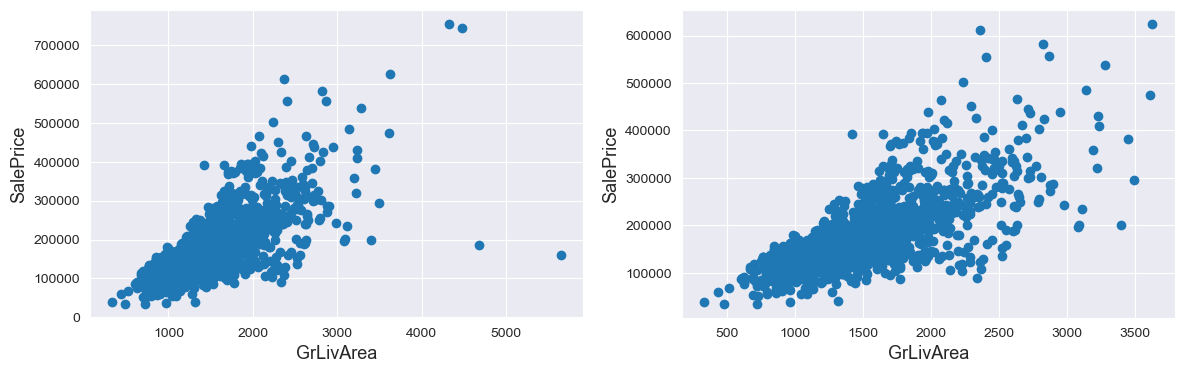

In [7]:
# Data preprocessing
# Outlier processing
plt.figure (figsize = (14, 4))
# First subplot: scatter plot of GrLivArea vs. SalePrice
plt.subplot (121) # First subplot in a 1x2 grid
plt.scatter (x = train ['GrLivArea'], y = train ['SalePrice']) # Scatter diagram
plt.ylabel ('SalePrice', fontsize = 13)
plt.xlabel ('GrLivArea', fontsize = 13)
# Identify and remove outliers
train = train.drop (train [(train ['GrLivArea']>4000) | (train ['SalePrice']>700000)].index)
# Second subplot: scatter plot after outlier removal
plt.subplot (122) # Second subplot in a 1x2 grid
plt.scatter (train ['GrLivArea'], train ['SalePrice'])
plt.ylabel ('SalePrice', fontsize = 13)
plt.xlabel ('GrLivArea', fontsize = 13)

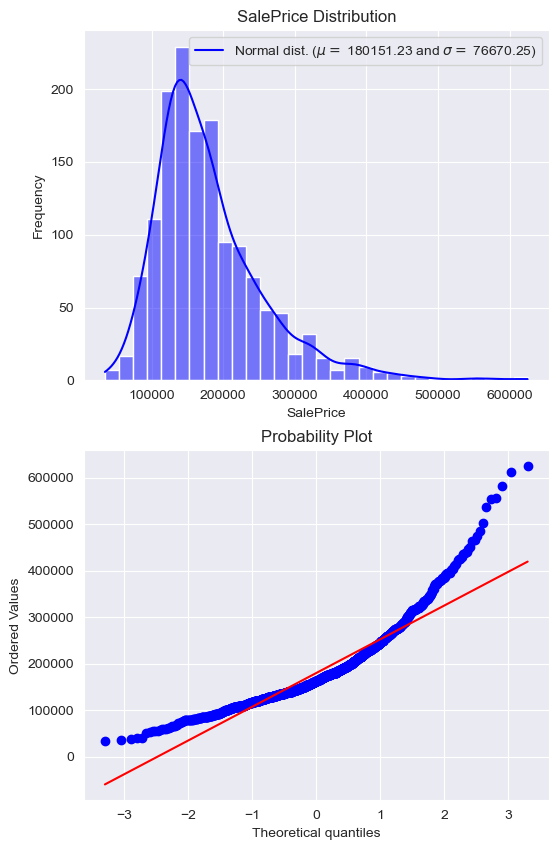

In [8]:
# Target variable analysis
fig, ax = plt.subplots (nrows = 2, figsize = (6,10)) # Log transformation of SalePrice
sns.histplot (train['SalePrice'], kde=True, ax=ax[0], color='blue', bins=30) # Histogram for log-transformed SalePrice
norm = stats.norm
(mu, sigma) = norm. fit (train['SalePrice'])
ax[0].legend (['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)],
              loc = 'best')
ax[0].set_ylabel ('Frequency')
ax[0].set_title ('SalePrice Distribution')

# QQ plot for log-transformed SalePrice
stats.probplot (train ['SalePrice'], plot = ax[1])
plt.show()

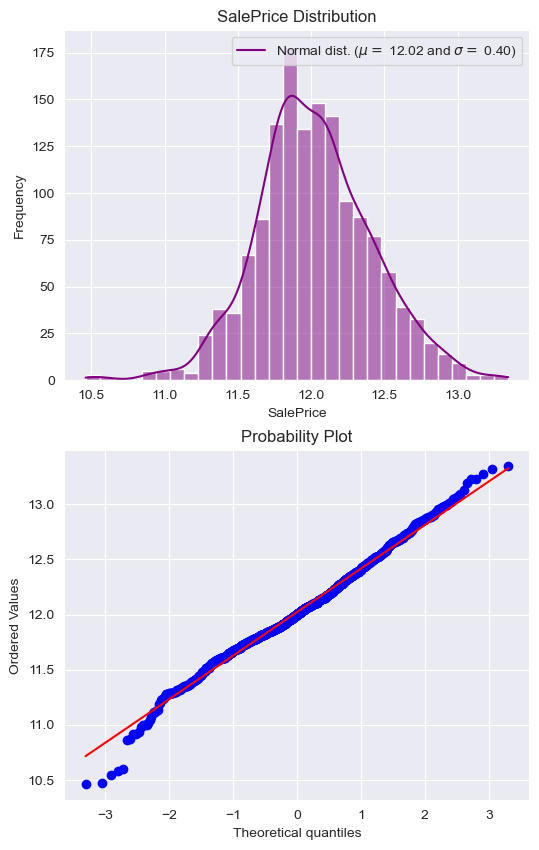

In [9]:
# Apply log(1+x) transformation
train['SalePrice'] = np.log1p (train['SalePrice'])

# Create subplots
fig,ax = plt.subplots (nrows = 2, figsize = (6,10))
sns.histplot (train['SalePrice'], kde=True, ax=ax[0], color='purple', bins=30)
(mu, sigma) = norm. fit (train['SalePrice'])
ax[0].legend (['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format (mu, sigma)],
              loc = 'best')
ax[0].set_ylabel ('Frequency')
ax[0].set_title ('SalePrice Distribution')

# QQ plot for transformed SalePrice
stats.probplot (train ['SalePrice'], plot = ax[1])
plt.show()

In [10]:
# Missing Value Processing
# Merge training set & testing set
all_data = pd.concat ((train, test)).reset_index (drop = True)
all_data.drop (['SalePrice'], axis = 1, inplace = True)

print ("all_data size is : {}".format (all_data.shape)) 

all_data size is : (2915, 79)


In [11]:
# Missing of each feature 
all_data_na = (all_data.isnull().sum() / len(all_data))*100 # Missing ratio
all_data_na

MSSubClass       0.000
MSZoning         0.137
LotFrontage     16.672
LotArea          0.000
Street           0.000
                 ...  
MiscVal          0.000
MoSold           0.000
YrSold           0.000
SaleType         0.034
SaleCondition    0.000
Length: 79, dtype: float64

In [12]:
all_data_na = all_data_na.drop (all_data_na[all_data_na == 0].index).sort_values (ascending = False)
missing_data = pd.DataFrame ({'Missing Ratio': all_data_na})
missing_data.head (10) # the top 10 highest missing ratio

,Missing Ratio
PoolQC,99.726
MiscFeature,96.398
Alley,93.208
Fence,80.446
MasVnrType,60.549
FireplaceQu,48.714
LotFrontage,16.672
GarageFinish,5.455
GarageQual,5.455
GarageCond,5.455


In [13]:
missing_data.shape[0] # The number of features that contain missing values

34

Text(0.5, 1.0, 'Percent missing data by feature')

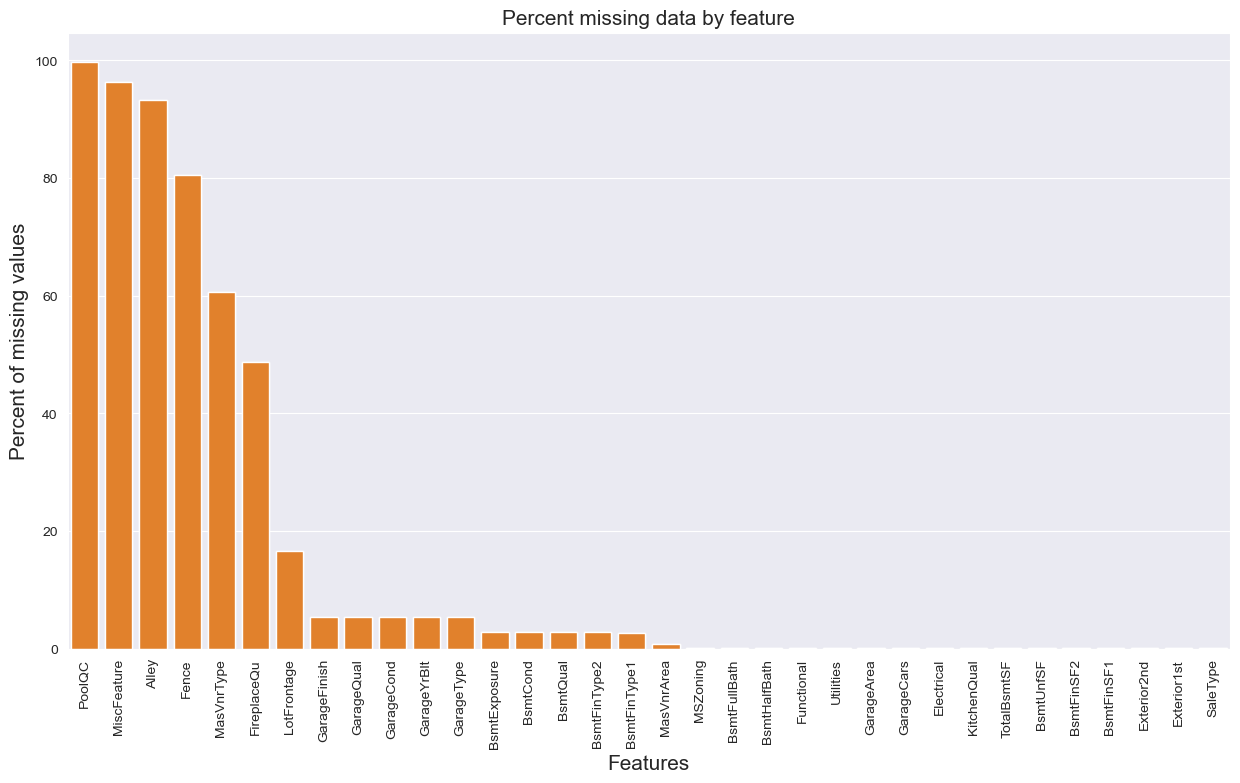

In [14]:
fig, ax = plt.subplots (figsize = (15,8))
sns.barplot (x = all_data_na.index, y = all_data_na)
sns.barplot(x=all_data_na.index, y=all_data_na, ax=ax)
plt.xticks(rotation=90) 
plt.xlabel ('Features', fontsize = 15)
plt.ylabel ('Percent of missing values', fontsize = 15)
plt.title ('Percent missing data by feature', fontsize = 15)

In [15]:
# Filling Missing Values in Features
# Define fill values for columns
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"]= all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"]= all_data["MasVnrArea"].fillna(0)
for col in ( 'GarageType','GarageFinish','GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea','GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [16]:
# Filling Missing Values for categorical features with few missing values with mode
all_data['MSZoning']= all_data['MSZoning'].fillna (all_data['MSZoning'].mode () [0])
all_data['Electrical']= all_data['Electrical'].fillna (all_data['Electrical'].mode () [0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna (all_data['KitchenQual']. mode () [0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna (all_data['Exterior1st'].mode() [0])
all_data['Exterior2nd'] = all_data['Exterior2nd']. fillna (all_data['Exterior2nd']. mode () [0])
all_data['SaleType']= all_data['SaleType' ].fillna (all_data['SaleType']. mode ()[0])

In [17]:
# Fill missing values in LotFrontage with the median of LotFrontage for each neighborhood
# as properties in the same neighborhood are likely to have similar street connections
all_data['LotFrontage'] = all_data.groupby ('Neighborhood') ['LotFrontage'].transform (lambda x: x.fillna(x.median()))

In [18]:
# Fill missing values in the Functional column with "Typ", 
# Due to data_description, assuming typical home functionality unless specific deductions are warranted
all_data['Functional'] = all_data['Functional'].fillna("Typ")

In [19]:
# Drop the 'Utilities' column due to extremely low variance,
# as it only contains a few unique values two 'NA', one 'NoSeWa', and others are'AllPub'.
all_data = all_data.drop(['Utilities'], axis=1)

In [20]:
# Check if there are any remaining missing values in the dataset
all_data.isnull(). sum(). max()

0

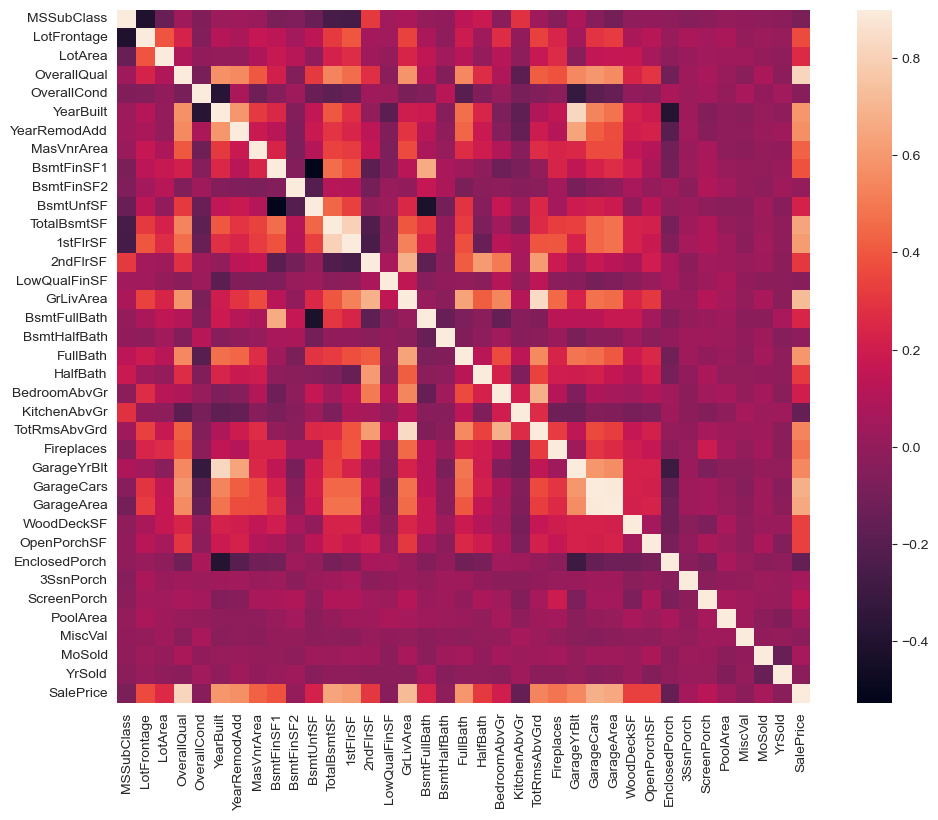

In [21]:
# Feature Correlation
# Removes the non-numeric column
train_numeric = train.select_dtypes(include=[np.number])

# Correlation matrix
corrmat = train_numeric.corr()
plt.figure (figsize = (12,9))
sns.heatmap (corrmat, vmax = 0.9, square=True)

plt.show ()

In [22]:
# Feature Mining
# Convert meaningless numerical values to categorical features for better interpretation
all_data ['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [23]:
# List of categorical features to be converted to numerical values
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu','BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond', 'HeatingQC', 'PoolQC', 'KitchenQual','BsmtFinType1',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold')

# Apply label encoding to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit (list (all_data[c].values))
    all_data[c] = lbl.transform (list (all_data[c].values))

print ('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2915, 78)


In [24]:
# Construction Features
# Create interaction features between overall quality and various area measurements
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['OverallQual_TotalSF'] = all_data['OverallQual'] * all_data['TotalSF']
all_data['OverallQual_GrLivArea'] = all_data['OverallQual'] * all_data['GrLivArea'] 
all_data['OverallQual_TotRmsAbvGrd'] = all_data['OverallQual'] * all_data['TotRmsAbvGrd']
all_data['GarageArea_YearBuilt'] = all_data['GarageArea'] * all_data['YearBuilt'] 

In [25]:
# Identify all numeric features in the DataFrame
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Calculate skewness for each numeric feature, ignoring NaN values
numeric_data = all_data [numeric_feats]
skewed_feats = numeric_data.apply (lambda x: skew (x.dropna())).sort_values (ascending=False)
skewness = pd.DataFrame ({'Skew': skewed_feats})
skewness.head()

,Skew
MiscVal,21.932
PoolArea,18.702
LotArea,13.124
LowQualFinSF,12.080
3SsnPorch,11.368


In [26]:
# Identify features with high skewness (greater than 0.75)
new_skewness = skewness[skewness.abs() > 0.75]

# Print the number of features that will be transformed by Box-Cox
print("There are {} high-skewness features that may be transformed by Box-Cox.".format(new_skewness.shape[0]))

There are 63 high-skewness features that may be transformed by Box-Cox.


In [27]:
from scipy.special import boxcox1p
# Identify the features with high skewness that will be transformed
skewed_features = new_skewness.index
lam = 0.15
# Apply Box-Cox transformation to each skewed feature
for feat in skewed_features:
    all_data[feat] = boxcox1p (all_data[feat], lam)

In [28]:
# One-hot encoding
df = pd.DataFrame ({'color': ['red', 'blue', 'yellow']})
# Perform one-hot encoding using get_dummies
# This converts categorical values into binary columns
dummy_df = pd.get_dummies(df)
# Convert True/False values to 0/1
dummy_df = dummy_df.astype(int)

print(dummy_df)

   color_blue  color_red  color_yellow
0           0          1             0
1           1          0             0
2           0          0             1


In [29]:
all_data = pd.get_dummies (all_data)
print (all_data.shape)

(2915, 224)


In [30]:
#pip install lightgbm

In [31]:
# Model Building
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [32]:
y_train = train.SalePrice.values
train = all_data[:train.shape[0]]
test = all_data[train.shape[0]:]

In [33]:
# Function for evaluating a model using RMSLE with K-Fold cross-validation
n_folds = 5
# Calculate the Root Mean Squared Logarithmic Error (RMSLE)
def rmsle_cv(model):
    kf = KFold (n_folds, shuffle = True, random_state=42).get_n_splits(train.values)
    rmse = np. sqrt (-cross_val_score (model, train.values, y_train, scoring = 'neg_mean_squared_error', cv=kf))
    return (rmse)

In [34]:
# LASSO Regression
Lasso = make_pipeline (RobustScaler(), Lasso (alpha=0.0005, random_state=1))

In [35]:
# Kernel Ridge Regression
KRR = KernelRidge (alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [36]:
# ElasticNet Regression
ENet = make_pipeline (RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [37]:
# Gradient Boosting Regression
GBoost = GradientBoostingRegressor (n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt',
                                    min_samples_leaf=15, min_samples_split=10,
                                    loss='huber', random_state=5) #设置hue loss使其对异常值具有鲁棒性robustness

In [38]:
# XBoost
model_xgb = xgb.XGBRegressor (colsample_bytree=0.5, gamma=0.5, learning_rate=0.05,
                              max_depth=3,min_child_weight=1.8, n_estimators=2200,
                              reg_alpha=0.5, reg_lambda=0.8,
                              subsample=0.5, random_state=7, nthread=-1)

In [39]:
#LightGBM
model_lgb = lgb.LGBMRegressor (objective='regression', num_leaves=5, learning_rate=0.05, 
                               n_estimators=720, max_bin=55, bagging_fraction=0.8,
                               bagging_freq=5, feature_fraction=0.2, feature_fraction_seed=9,
                               bagging_send=9, min_data_in_leaf=6, min_sum_hessian_in_leaf=11, verbose=-1)

In [40]:
models = {'Lasso': Lasso, 'ElasticNet': ENet, 'Kernel Ridge': KRR,
          'Gradient Boosting': GBoost, 'XGBoost': model_xgb, 'LightGBM': model_lgb}
for model_name, model in models.items():
    score = rmsle_cv (model)
    print ('{}: {:.4f} ({:.4f})\n'.format (model_name, score.mean(), score.std()))

#Lasso is best

Lasso: 0.1111 (0.0073)

ElasticNet: 0.1111 (0.0074)

Kernel Ridge: 0.1176 (0.0081)

Gradient Boosting: 0.1166 (0.0078)

XGBoost: 0.1354 (0.0050)

LightGBM: 0.1162 (0.0070)



In [41]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models    # First layer models
        self.meta_model = meta_model    # Second layer model
        self.n_folds = n_folds

    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)

        # Train cloned base models
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred

        # Train the cloned meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
    
    # Generate meta-features as the mean of predictions from each base model
    def predict (self, X):
        meta_features = np.column_stack ([np.column_stack ([model.predict(X) for model in base_models]).mean (axis=1)
                                      for base_models in self.base_models_])
        return self.meta_model_.predict (meta_features)

In [42]:
stacked_averaged_models = StackingAveragedModels (base_models = (ENet, GBoost, Lasso), meta_model = KRR)

score = rmsle_cv (stacked_averaged_models) 
print ("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

# better score than the previous single model

Stacking Averaged models score: 0.1081 (0.0069)


In [43]:
# Build the final model
def rmsle (y, y_pred):
    return np.sqrt (mean_squared_error(y, y_pred))

In [44]:
# Stacked Regressor
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print (rmsle(y_train, stacked_train_pred))

0.0802942951766835


In [45]:
# XGBoost
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print (rmsle(y_train, xgb_train_pred))

0.11870288164396488


In [46]:
#LightGBM
model_lgb.fit (train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print (rmsle(y_train, lgb_train_pred))

0.07209777494489372


In [47]:
print ('Integration model score:{}'.format(rmsle(y_train, stacked_train_pred * 0.70 + xgb_train_pred * 0.15 + lgb_train_pred * 0.15)))

Integration model score:0.08088148664819664


In [48]:
ensemble = stacked_pred * 0.70 + xgb_pred * 0.15 + lgb_pred * 0.15

In [49]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv ('submission.csv', index=False)

In [ ]:
submission.csv